<a href="https://colab.research.google.com/github/plaban1981/NLP-Transfer-Learning/blob/master/NLP_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intution : how transfer learning can be applied to NLP task

In [0]:
import os
import time
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In conventional NLP task we perform the followings task

1. Text Preprocessing

2. Tokenization

3. Normalize data using steeming/lemmatization

4. Create an embedding vector

5.  Develop the final model

Rather than doing all these steps is there an easy way out where in we just feed the incoming texts and a pretrianed Model takes care of the subsequent processes?


In [0]:
dataset , info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00',with_info=True,split=('train[:70%]','train[70%:85%]','train[85%:]'))

In [6]:
print(info)

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

# Consuming data

*Retrieve Train ing,validation and test sets*

In [0]:
train = dataset[0]
test = dataset[1]
validation = dataset[2]

In [78]:
for reviews in train.take(5):
  print(reviews['data'])

{'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'13986323'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Personal_Care_Appliances'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00847JQZ6'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'997683625'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b"These glasses are an excellent value.  The fit is good and they are very comfortable.  Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.">, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2015-01-04'>, 'r

In [0]:
@tf.function
def target(x):
  if x > 3:
    return 1
  else:
    return 0
# @tf.function compile this function into a callable tensorflow graph

# Formating the reviews data and corresponding labels

* reviews-text - review_body
* rating - star_rating

In [80]:
for reviews in train.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  star_rating = review_text.get('star_rating')
  print(star_rating)
  print(target(star_rating).numpy())

b"These glasses are an excellent value.  The fit is good and they are very comfortable.  Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available."
tf.Tensor(4, shape=(), dtype=int32)
1
b"Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER saf

# Function to take tensor object and retrieve text and label

In [0]:
def fetch(tensor):
  text = tensor['data'].get('review_body')
  label = target(tensor['data'].get('star_rating'))
  return text,label

# apply the function on the sample dataset

In [0]:
train_data_f = dataset[0].map(fetch)
test_data_f = dataset[1].map(fetch)
val_data_f = dataset[2].map(fetch)

In [83]:
train_data_f 

<DatasetV1Adapter shapes: ((), ()), types: (tf.string, tf.int32)>

In [0]:
train_data, train_labels = next(iter(train_data.batch(50)))

# fetch a pretrained moel from tensorflow hub - Token based text embedding trained on English Google News 200B corpus.

Takes as input a 1D tensor

take input split it based on spaces

return individual embedding for individual word and combine it into a sentence emdedding and return the value

In [84]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable=True) # return Sentence embedding
hub_layer(train_data[:1])

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 9.08966899e-01, -3.92715633e-02,  2.30431050e-01,
         3.50282967e-01,  1.77038979e-04, -7.16442168e-02,
        -2.96347905e-02, -1.65321141e-01, -1.76558182e-01,
         1.45377725e-01, -1.37284935e-01, -1.85801834e-01,
        -1.52072802e-01, -2.10003346e-01,  1.26340222e-02,
        -4.82303537e-02, -2.94979401e-02,  1.18068270e-02,
        -2.28926703e-01,  3.83403301e-01,  2.15362415e-01,
        -1.86364371e-02, -1.61504507e-01,  2.66199224e-02,
         3.58809414e-03, -1.77836776e-01,  1.60982013e-01,
        -3.79788391e-02,  2.93056052e-02, -1.47457393e-02,
        -5.37362974e-03,  1.12550780e-01,  2.18634501e-01,
        -2.98036665e-01,  3.06068927e-01,  1.51045108e-02,
        -8.92712921e-02, -9.56266969e-02, -6.81300387e-02,
         2.99906552e-01,  9.61523782e-03, -1.55273601e-01,
        -8.90835896e-02, -2.39175022e-01,  9.74332169e-02,
         1.93529993e-01, -1.15207426e-01, -1.61249265e-01,
      

Create a Keras Sequential model for classification

In [85]:
model = tf.keras.Sequential()
model.add(hub_layer) # add the pretrained model base
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 124,647,361
Trainable params: 124,647,361
Non-trainable params: 0
________________________________________

#compile the model

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# Shuffle the data and create a batch of 512 vectors

In [0]:
train_data_f = train_data_f.shuffle(70000).batch(512)
val_data_f = val_data_f.batch(512)

# Train the model

In [88]:
history = model.fit(train_data_f,epochs=5,validation_data=val_data_f,verbose=1)

Epoch 1/5
118/118 [==============================] - 14s 117ms/step - loss: 0.5541 - accuracy: 0.7604 - val_loss: 0.4925 - val_accuracy: 0.8426
Epoch 2/5
118/118 [==============================] - 14s 117ms/step - loss: 0.4827 - accuracy: 0.8695 - val_loss: 0.4845 - val_accuracy: 0.8622
Epoch 3/5
118/118 [==============================] - 14s 117ms/step - loss: 0.4677 - accuracy: 0.8995 - val_loss: 0.4846 - val_accuracy: 0.8587
Epoch 4/5
118/118 [==============================] - 14s 116ms/step - loss: 0.4604 - accuracy: 0.9135 - val_loss: 0.4851 - val_accuracy: 0.8541
Epoch 5/5
118/118 [==============================] - 14s 117ms/step - loss: 0.4558 - accuracy: 0.9227 - val_loss: 0.4855 - val_accuracy: 0.8559


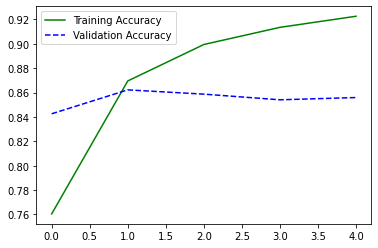

In [89]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'g',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b--',label='Validation Accuracy')
plt.legend()
plt.show()

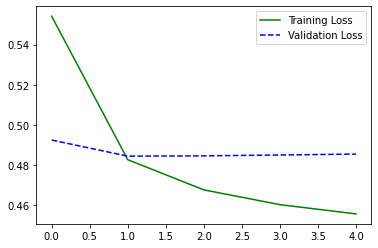

In [90]:
plt.plot(history.history['loss'],'g',label='Training Loss')
plt.plot(history.history['val_loss'],'b--',label='Validation Loss')
plt.legend()
plt.show()

# Evaluate the trained model for the Test Data

In [91]:
results = model.evaluate(test_data_f.batch(512),verbose=2)
print(results)

26/26 - 1s - loss: 0.4842 - accuracy: 0.8581
[0.4842487871646881, 0.8581065535545349]


*The model does not overfit as evident from the validation accuracy which is 85%. Also we have only built a base model*

## Predictions

In [92]:
for txt,l in test_data_f.batch(15000):
  y = l
  y_pred = tf.where(model.predict(txt) > 0.5,1,0)
  print(tf.math.confusion_matrix(labels=y,predictions=y_pred,num_classes=2))

tf.Tensor(
[[2681  805]
 [1025 8386]], shape=(2, 2), dtype=int32)


## functions Used :

* Batch

Usually batching data is a pain in very cubersome , with the Dataset API we can use the method batch(BATCH_SIZE) that automatically batches the dataset with the provided size.

* Shuffle

We can shuffle the Dataset by using the method shuffle() that shuffles the dataset by default every epoch.
Remember: shuffle the dataset is very important to avoid overfitting.

* Map

You can apply a custom function to each member of a dataset using the map method.

# Other resources

TensorFlow dataset tutorial: https://www.tensorflow.org/programmers_guide/datasets

Dataset docs:
https://www.tensorflow.org/api_docs/python/tf/data/Dataset

https://towardsdatascience.com/how-to-use-dataset-in-tensorflow-c758ef9e4428

## Conclusion

We could see that Transfer learning can also be applicable to NLP tasks , not limiting to image classification.

The accuracy can still be improved by adding a conv1D layer or introducing a LSTM layer , but here the main intution was to apply transfer learning to text data.